In [1]:
import pandas as pd



# contigs  Generated  with IDBA ASSEMBLER   after   BLAST analysis 

In [2]:
df_blast = pd.read_csv("Linj_mini_table.txt",sep="\t",header=0)

df_blast.astype({"Description": str, "contig": str}) 
df_blast.head()

,contig,Description,E-Value,Score
0,LinJ_min_28,MT598368.1 Leishmania infantum isolate LIPA60-...,0.0,1051.0
1,LinJ_min_29,MT598315.1 Leishmania infantum isolate LIPA83-...,0.0,1123.0
2,LinJ_min_26,JX156512.1 Leishmania chagasi isolate Dog1 clo...,0.0,1225.0
3,LinJ_min_27,MT598582.1 Leishmania infantum isolate ZK25-cl...,0.0,1214.0
4,LinJ_min_24,MT598499.1 Leishmania infantum isolate ZK28-cl...,0.0,911.0


In [3]:
df_blast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
contig         49 non-null object
Description    49 non-null object
E-Value        49 non-null float64
Score          49 non-null float64
dtypes: float64(2), object(2)
memory usage: 1.6+ KB


In [4]:
df_blast.describe()

,E-Value,Score
count,49.0,49.000000
mean,0.0,1162.673469
std,0.0,101.595683
min,0.0,900.000000
25%,0.0,1134.000000
50%,0.0,1194.000000
75%,0.0,1223.000000
max,0.0,1349.000000


## TEST of circular minicercles

In [5]:
with open ('contig_renamed_circles.fa','r') as circles , open ('contig_renamed.fa','r') as assembly_contigs :
    a=0
    for line in assembly_contigs:
        line = line.rstrip('\n') 
        if line[0] == ">" :
            a+=1
    

FileNotFoundError: [Errno 2] No such file or directory: 'contig_renamed_circles.fa'

In [ ]:
a

# generating fasta file for blast analysis with our Data 

In [ ]:
with  open ('LinJ_cbm_circular_minicircles-blast_lables.fasta','r+') as f :
    split_list=f.read().split(">LinJ_min_10")
    contents_1 = split_list[1]
    contents_0 = split_list[0]
    print (contents_0)
    with  open ('LinJ_cbm_circular_minicircles.fasta','r+') as assembly_contigs :

        for line in assembly_contigs:
            line = line.rstrip('\n') 
            if line[0] == ">" :
                contig_name=line.split(" ")[0].split(">")[1]
                #print(contig_name)

                description =df_blast.loc[df_blast['contig'] == contig_name]["Description"]
                if description.size ==1:
                    description=description[description.index[0]]
                    print (description)
                    
                    if len("LinJ_min_xx")== len (contig_name):
                            contents_1= contents_1.replace(contig_name,contig_name+"  "+ description)
                         
                    elif len("LinJ_min_x")== len (contig_name) :
                            contents_0 = contents_0.replace(contig_name,contig_name+"  "+ description)
    

    
    
    f.seek(0)
    f.truncate()
    f.write(contents_0 + contents_1)


                        


           

we get a fasta ("contig_renamed - Copie.fa") file containing the contigs lebled with  description from the blast search and ready for blast analysis with our data

# contigs comparison 

In [35]:
dtypes = {
    "query": "category",
    "id_": "category",
    "description": "category",
    "Eval": "float",
    "score": "float"
  
}
df_annotated= pd.read_csv("final_blast_annotated_minicirciles_table.txt",sep="\t",dtype=dtypes)
df_annotated.head()

,query,id_,description,Eval,score
0,3E5.IM,LinJ_min_4,AJ223724.1 Leishmania infantum. Minicircle DNA...,1.000000e-73,267.0
1,1E8.IM,LinJ_min_1,MT598323.1 Leishmania infantum isolate ZK5-cla...,3.000000e-60,222.0
2,1E2.IM,LinJ_min_1,MT598323.1 Leishmania infantum isolate ZK5-cla...,6.000000e-62,228.0
3,3E1.IM,LinJ_min_17,AJ275333.1 Leishmania infantum kinetoplast par...,5.000000e-73,265.0
4,3E14.IM,LinJ_min_21,AF188701.1 Leishmania infantum isolate MHOM/...,3.000000e-65,239.0


In [36]:

#df_annotated['idLmin']=map(lambda x : str(x).split(" ")[0], df_annotated['description'])

In [37]:
df_annotated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
query          32 non-null category
id_            32 non-null category
description    32 non-null category
Eval           32 non-null float64
score          32 non-null float64
dtypes: category(3), float64(2)
memory usage: 3.6 KB


In [38]:
df_annotated

,query,id_,description,Eval,score
0,3E5.IM,LinJ_min_4,AJ223724.1 Leishmania infantum. Minicircle DNA...,1.000000e-73,267.0
1,1E8.IM,LinJ_min_1,MT598323.1 Leishmania infantum isolate ZK5-cla...,3.000000e-60,222.0
2,1E2.IM,LinJ_min_1,MT598323.1 Leishmania infantum isolate ZK5-cla...,6.000000e-62,228.0
3,3E1.IM,LinJ_min_17,AJ275333.1 Leishmania infantum kinetoplast par...,5.000000e-73,265.0
4,3E14.IM,LinJ_min_21,AF188701.1 Leishmania infantum isolate MHOM/...,3.000000e-65,239.0
5,3E,LinJ_min_4,AJ223724.1 Leishmania infantum. Minicircle D...,1.000000e-73,267.0
6,3B2.IM,LinJ_min_17,AJ275333.1 Leishmania infantum kinetoplast p...,5.000000e-73,265.0
7,3E26.A,LinJ_min_32,MT598291.1 Leishmania infantum isolate ZK25-...,6.000000e-52,195.0
8,3E25.IM,LinJ_min_1,MT598323.1 Leishmania infantum isolate ZK5-c...,3.000000e-60,222.0
9,1E9.IM,LinJ_min_1,MT598323.1 Leishmania infantum isolate ZK5-c...,6.000000e-62,228.0


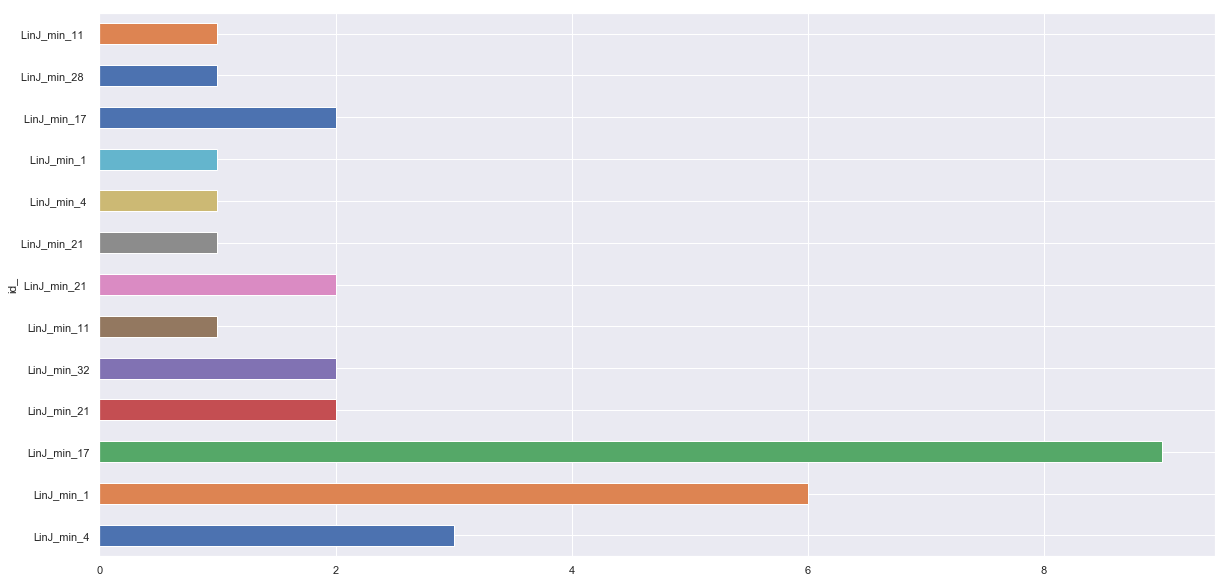

In [55]:

df_count=df_annotated.groupby("id_", sort=False)["query"].count()
df_count.plot(kind='barh', figsize=(20,10))

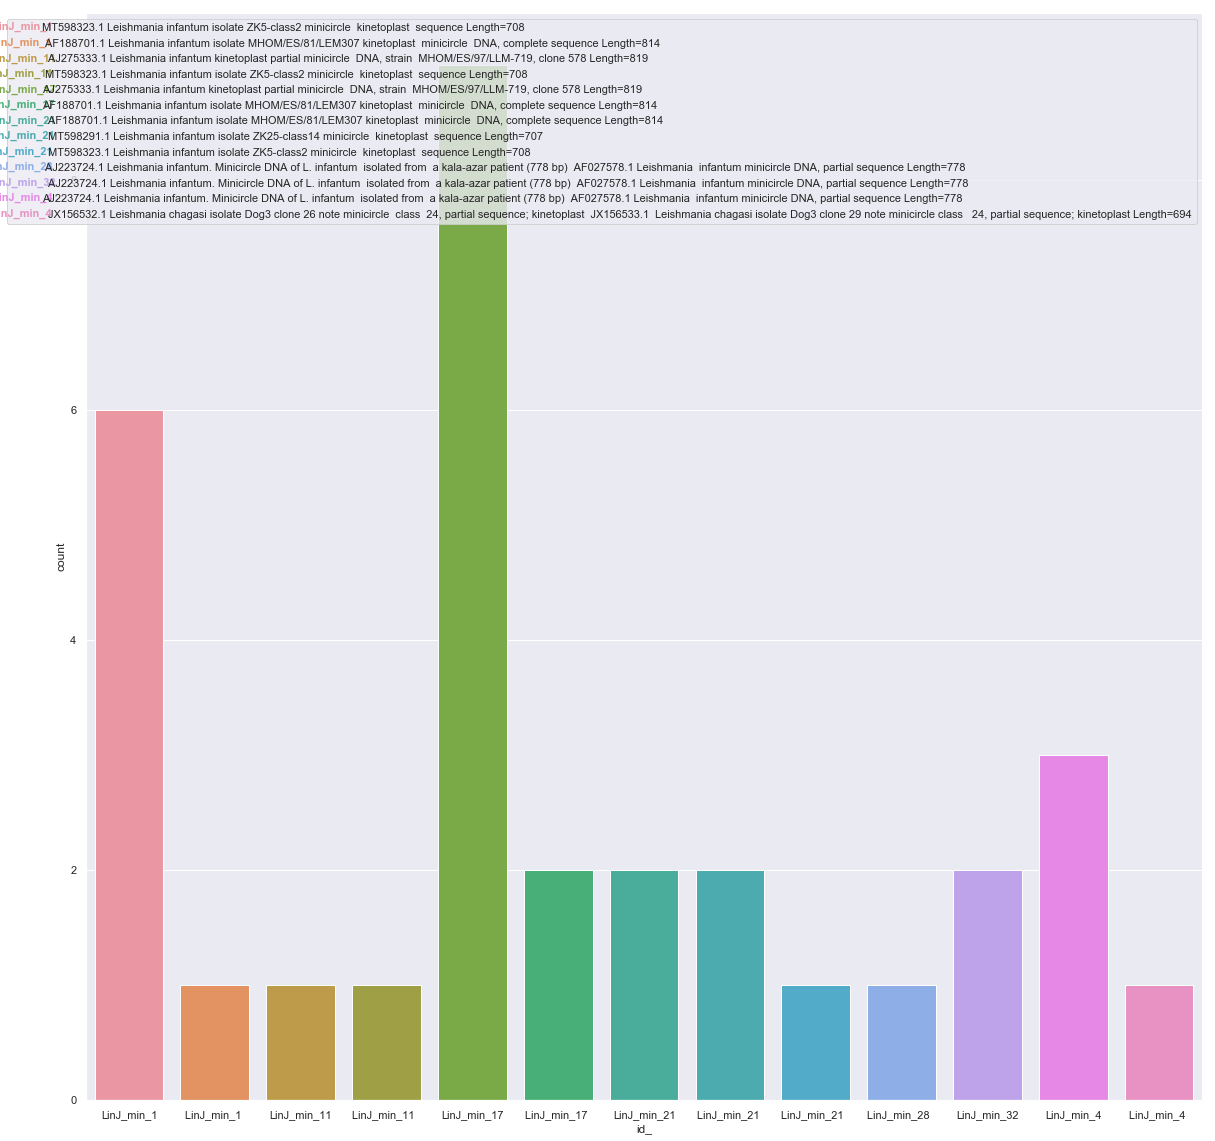

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import numpy as np
import pandas as pd
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]
sf=df_annotated.groupby(["id_","description"], sort=False)["query"].count()

df_count=sf.to_frame()
plt.figure(figsize=(20,20))
ax = sns.countplot(x = df_annotated.id_)    
handltext = list(df_count.index.levels[0])
labels = list(df_count.index.levels[1])


t = ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 


plt.show()

the majority of the local sequencing data  produced by sanger technology mapped to  min17


# contigs classification 

# # preprocessing 

In [16]:
from Bio.Seq import Seq
from Bio import SeqIO
length=800
for record in SeqIO.parse("LinJ_cbm_circular_minicircles.fasta", "fasta"):
    print(record.id)
    print ("%i %i %i %i " % (record.seq.find('GGGGTGGGTGTA'),record.seq.find(Seq('AGGGGCGTTC').upper()),record.seq.find(Seq('cCCCGT').upper()),len(record)))
    if len(record)< length:
        length=len(record)
print (length)


LinJ_min_1
-1 24 -1 787 
LinJ_min_2
-1 24 -1 786 
LinJ_min_3
-1 24 -1 785 
LinJ_min_4
-1 -1 -1 2352 
LinJ_min_5
-1 24 62 783 
LinJ_min_6
-1 24 -1 778 
LinJ_min_7
-1 24 -1 777 
LinJ_min_8
-1 24 -1 776 
LinJ_min_9
-1 24 -1 776 
LinJ_min_10
-1 24 -1 775 
LinJ_min_11
117 24 -1 778 
LinJ_min_12
-1 -1 -1 784 
LinJ_min_13
-1 24 -1 792 
LinJ_min_14
-1 24 -1 783 
LinJ_min_15
117 24 -1 822 
LinJ_min_16
-1 24 -1 817 
LinJ_min_17
-1 24 -1 819 
LinJ_min_18
-1 24 -1 815 
LinJ_min_19
-1 24 -1 814 
LinJ_min_20
-1 24 -1 811 
LinJ_min_21
-1 24 -1 810 
LinJ_min_22
-1 24 -1 809 
LinJ_min_23
-1 24 -1 809 
LinJ_min_24
-1 24 -1 809 
LinJ_min_25
-1 24 -1 807 
LinJ_min_26
-1 24 -1 807 
LinJ_min_27
-1 24 -1 807 
LinJ_min_28
-1 24 -1 805 
LinJ_min_29
-1 24 -1 802 
LinJ_min_30
-1 24 -1 802 
LinJ_min_31
-1 -1 -1 802 
LinJ_min_32
-1 24 -1 801 
LinJ_min_33
-1 24 -1 801 
LinJ_min_34
-1 24 -1 799 
LinJ_min_35
-1 24 -1 799 
LinJ_min_36
-1 24 -1 797 
LinJ_min_37
-1 24 -1 796 
LinJ_min_38
-1 24 -1 795 
LinJ_min_39
117 24

In [18]:
from Bio import SeqIO
with open ("logo.txt","w") as logo :
    
    for record in SeqIO.parse("LinJ_cbm_circular_minicircles.fasta", "fasta"):
        logo.write(">"+record.id +"\n")
        logo.write(str(record.seq[0:775])+"\n")
    

In [ ]:
from gtfparse import read_gtf

# returns GTF with essential columns such as "feature", "seqname", "start", "end"
# alongside the names of any optional keys which appeared in the attribute column
df = read_gtf("LinJ.gtf")
